# Análisis de Proporción de Género (Julia)

In [1]:
using CSV, DataFrames

# Ruta del archivo
file_path = "../data/raw/Paper1_WebData_Final.csv"

# Cargar el CSV en un DataFrame
df = CSV.read(file_path, DataFrame)

# Mostrar las primeras 5 filas
first(df, 5)


Row,test_date,nid,L500k,L1k,L2k,L3k,L4k,L6k,L8k,R500k,R1k,R2k,R3k,R4k,R6k,R8k,gender,naics,age_group,region,NAICS_descr
,String15,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,String1?,Int64,Int64,String3?,String
1,12-FEB-2007,1,10,5,5,15,5,0,20,20,20,10,10,25,30,45,M,331512,4,MA,Steel Investment Foundries
2,29-FEB-2008,2,15,5,15,20,20,15,15,10,0,10,15,30,20,15,M,331512,3,MA,Steel Investment Foundries
3,08-FEB-2006,3,25,20,15,20,35,25,15,20,20,10,15,40,30,30,M,331512,3,MA,Steel Investment Foundries
4,29-FEB-2008,6,10,10,10,35,50,30,10,10,10,5,30,35,25,20,M,331512,4,MA,Steel Investment Foundries
5,08-FEB-2006,8,15,15,5,15,45,30,20,15,15,5,40,50,20,5,M,331512,3,MA,Steel Investment Foundries


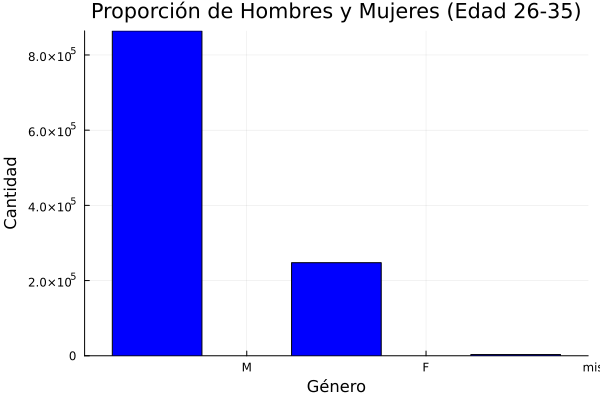

In [2]:
using Plots
gr()  # Activar backend GR para Jupyter

# Contar ocurrencias por género
gender_counts = combine(groupby(df, :gender), nrow => :count)

# Crear gráfico de barras
bar(
    gender_counts.gender,
    gender_counts.count,
    title = "Proporción de Hombres y Mujeres (Edad 26-35)",
    xlabel = "Género",
    ylabel = "Cantidad",
    legend = false,
    xticks = (1:length(gender_counts.gender), gender_counts.gender),
    bar_width = 0.5,
    color = [:blue :pink]
)


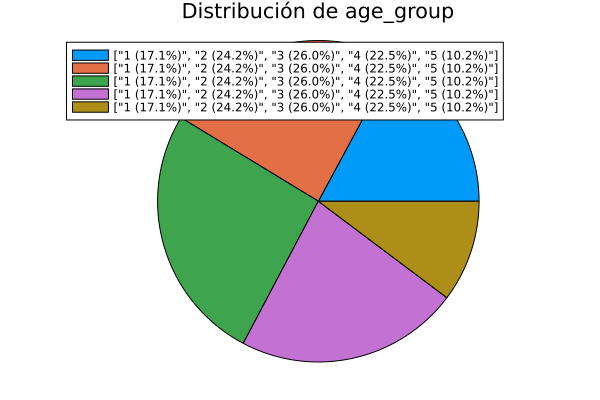

In [3]:
# Contar ocurrencias por grupo de edad
age_counts = combine(groupby(df, :age_group), nrow => :count)

# Calcular porcentajes
total = sum(age_counts.count)
labels = [ "$(age_counts.age_group[i]) ($(round(age_counts.count[i]/total*100, digits=1))%)"
           for i in 1:length(age_counts.age_group) ]

# Crear gráfico de torta
pie(
    age_counts.count,
    labels = labels,
    title = "Distribución de age_group"
)


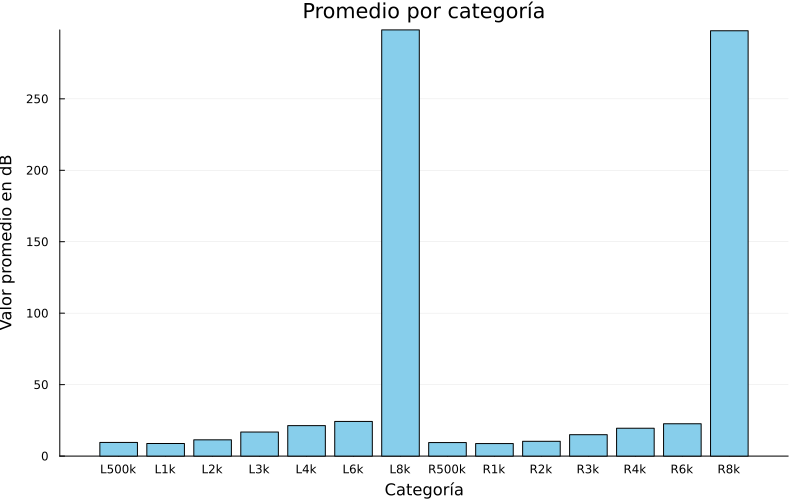

In [6]:
using DataFrames
using Statistics
using Plots

# Lista de categorías
categorias = ["L500k","L1k","L2k","L3k","L4k","L6k","L8k","R500k","R1k","R2k","R3k","R4k","R6k","R8k"]

# Supongamos que ya tienes un DataFrame llamado df
# Calcular el promedio de cada categoría
promedios = [mean(skipmissing(df[!, cat])) for cat in categorias]

# Crear el gráfico de barras
bar(categorias, promedios,
    title = "Promedio por categoría",
    xlabel = "Categoría",
    ylabel = "Valor promedio en dB",
    legend = false,
    color = :skyblue,
    grid = :y,
    size = (800, 500))

